### [<font color='black'> University of Naples Federico II</font>](http://www.unina.it/unina-international),  [<font color='black'>School of Polytechnic and Basic Sciences</font> ](http://www.scuolapsb.unina.it/), [<font color='black'>Department of Mathematics and Applications "Renato Caccioppoli"</font>](http://www.matematica.unina.it/) ###

# <center><font color='#000066'>Eigenface problem and its use in face recognition </font></center> #
   ###  Fabiani Gianluca, Panico Marco, Pezzella Mario ###
   
#### Abstract####
In this work we will study some elements of mathematical theory of $\mathit{Principal \ Component \ Analysis} \ (\mathbf{PCA})$ and $\mathit{Singular \ Value \ Decomposition} \ (\mathbf{SVD})$, due their involving in face recognition problems.<br>
The theoretical treatment of the described results is accompanied by codes developed in the Python programming language.


## Contents  ##
1. [Theorical preface](#Theorical) 
2. [General description of the problem](#General)<br>
    2.1 [Practical implementation](#Practical)<br>
    2.2 [Connection with SVD: eigenvalues computation](#Connection)<br>
    2.3 [Code I: database loading, eigenfaces creation and principal components selection](#Code1)<br>
3. [Facial recognition problem](#Facial)<br>
    3.1 [Code II: facial recognition](#Code2)<br>
    3.2 [Different executions of Code II](#Code2esecuzio)<br>
4. [Estimation of parameters $\varepsilon$, $\theta_1$ and $\theta_2$](#Estimation)<br>
    4.1 [Code III: estimation of parameter $\varepsilon$](#Code3) <br>
    4.2 [Code IV: estimation of parameters $\theta_1$ and $\theta_2$](#Code4)<br>
5. [Testing phase: precision, recall and confusion matrix](#test)<br>
    5.1 [Code V: testing phase](#Code5)
6. [Databases' links](#Databases)
7. [Extra codes](#Extra)
8. [References](#References)




## <font color='#000080'>Theorical preface</font>  <a id='Theorical'></a>

First of all, absolutly necessary to be known the following basic definitions, which will be widely used from here onwards.

$\mathbf{Definition\ 1.1}$ <a id='Def1.1'></a> Let $A \in \mathbb{R}^{n \times n}$ be a square $n$-dimensional real matrix, $\lambda \in \mathbb{C}$ and $\underline{v} \in \mathbb{R}^{n}-\{ \underline{0}\}$, so we'll define $\underline{v}$ an eigenvector of eigenvalue $\lambda$ for $A$, if $A\underline{v}=\lambda \underline{v}$ or equivalently if $\det(A-\lambda I)=0$.


$\mathbf{Definition\ 1.2}$ <a id='Def1.2'></a> Let $X=(\underline{X}_1,\underline{X}_2,\dots,\underline{X}_n)$ be a vector of aleatory variables with values in $\mathbb{R}^{n}$ (so it's a matrix),  we'll define the coviarance matrix $cov(X)$ as the one whose element of indices $i,j$ are given by: 
\begin{equation}{cov(X)_{\underline{X}_i,\underline{X}_j}=\mathbb{E}[(\underline{X}_i-\mathbb{E}[\underline{X}_i])(\underline{X}_j-\mathbb{E}[\underline{X}_j])^T]}
\end{equation} 
where $\mathbb{E}[\underline{X}_i]$ represents the mean (or expected value) vector of the variable $\underline{X}_i$.

$\mathbf{Definition\ 1.3}$ <a id='Def1.3'></a> Let $M \in \mathbb{C}^{m \times n}$ be a rectangular $m \times n-dimensional$ complex matrix, we'll define $\mathit{Singular \ Value \ Decomposition} \ (\mathbf{SVD})$ a factorization of the form $M=U\Sigma V^{*}$, where $U$ is an $m\times m$ real or complex unitary matrix, $\Sigma$ is an $m\times n$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $V$ is a $n\times n$ real or complex unitary matrix. <br> The diagonal entries $\sigma _{i}$ of $\Sigma$ are known as the singular values of $M$. The columns of $U$ and the columns of $V$ are called the left-singular vectors and right-singular vectors of $M$, respectively. 

A sketch about this kind of factorization in given by the [$\mathbf{Figure\ 1.1}$](#Fig1.1).

$\mathbf{Theorem\ 1.1}$ Suppose $M \in \mathbb{K}^{m \times n}$ be a rectangular matrix whose elements come from the field $\mathbb{K}$, i.e. the field of real numbers $\mathbb{R}$ or the field of complex numbers $\mathbb{C}$. Then there exists a factorization, called a $\mathit{Singular \ Value \ Decomposition} \ (\mathbf{SVD})$ of $M$, of the form given by [$\mathbf{Definition 1.3}$](#Def1.3), where
<br>
$U\in \mathbb{K}^{m \times m}$ is an unitary matrix;<br>
$\Sigma \in \mathbb{K}^{m \times n}$ is a diagonal matrix with non-negative real numbers on the diagonal;<br>
$V\in \mathbb{K}^{n \times n}$ unitary matrix over $\mathbb{K}$, and $V^∗$ is the conjugate transpose of $V$.<br>
A common convention is to list the singular values in descending order. In this case, the diagonal matrix, $\Sigma$, is uniquely determined by $M$. 


Lastly we want to underline also a geometric interpretation of $\mathbf{SVD}$, which starts by seeing the $M$ matrix as a map which transforms an hyperspherical $n$-dimensional surface in an $m$-dimensional hyperelliptical surface. In this viosion $\Sigma$ can be regarded as a scaling matrix, and $U$, $V^*$ can be viewed as rotation matrices. Thus the expression $U\Sigma V^*$ can be intuitively interpreted as a composition of three geometrical transformations: a rotation or reflection, a scaling, and another rotation or reflection. 
For instance, the [$\mathbf{Figure\ 1.2}$](#Fig1.1) shows the particular case study of $m=n=2$.


<a id='Fig1.1'></a>
![Alt text](https://i.ibb.co/0X0BCBm/SVDfigures.png)


## <font color='#000080'>General description of the problem</font> <a id='General'></a>

In this work we will refer, with the name of eigenfaces, to a a set of eigenvectors (as reported in [$\mathbf{Definition 1.1}$](#Def1.1)) used in the computer vision problem of human face recognition.
<br>
This ones will be derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images, and they themselves form a basis set of all images used to construct the covariance matrix. This process, known as dimension reduction, allows training original images to be represented with only the elements of a smaller set of basis images.
<br>
A set of eigenfaces can be generated by performing a $\mathit{Principal \ Component \ Analysis} \ (\mathbf{PCA})$ process on a large set of images depicting different human faces. 

Informally, eigenfaces can be considered as a set of "standardized face ingredients", derived from statistical analysis of many pictures of faces, starting from which any human face can be obtained. Remarkably, it does not take many eigenfaces combined together to achieve a fair approximation of most faces. Also, because a person's face is not recorded by a digital photograph, but instead as just a list of values (one value for each eigenface in the database used), much less space is taken for each person's face.

The eigenfaces that are created in this way, seen as images, will appear as light and dark areas that are arranged in a specific pattern ([$\mathbf{Figure\ 2.1.2}$](#Fig2.1) shows some eigenfaces for the AT&T Database). This pattern is how different features of a face are singled out to be evaluated and scored. There will be a pattern to evaluate symmetry, if there is any style of facial hair, where the hairline is, or evaluate the size of the nose or mouth. Other eigenfaces have patterns that are less simple to identify, and the image of the eigenface may look very little like a face.
<br>
The technique used in creating eigenfaces and using them for recognition is also used outside of face recognition. This technique is also used for Handwriting recognition, lip reading, voice recognition, sign language/hand gestures interpretation and medical imaging analysis. Therefore, some do not use the term eigenface, but prefer to use 'eigenimage'. 

### <font color='#0000cc'> Practical implementation</font> <a id='Practical'></a> 
To create a set of eigenfaces, one must:

• Prepare a training set of $n$ face images. The pictures constituting the training set should have been taken under the same lighting conditions, and must be normalized to have the eyes and mouths aligned across all images. They must also be all resampled to a common pixel resolution $(h×w)$.<br> 
Each image is treated as one vector $\underline{\Gamma}_i$, simply by concatenating the rows of pixels in the original image, resulting in a single column with $(h\cdot w)$ elements. For this implementation, it is assumed that all images of the training set are stored in a single matrix $\Gamma$, where each column of the matrix is an image.
<br>
• The average(or mean) face $\underline{\Psi}=\dfrac{1}{n}\displaystyle\sum_{i=1}^{n}\underline{\Gamma}_i$ has to be calculated and then subtracted from each original image in $\Gamma$, to obtain the new $(h\cdot w)×n$ matrix $X$.<br>
This new matrix will cointain the details of every picture, as the ones which make it on avarege different from the mean face. ([$\mathbf{Figure\ 2.1.1}$](#Fig2.1) shows the mean face for the AT&T Database)

• Calculate the eigenvectors and eigenvalues of the covariance matrix $C=cov(X)$ according to [$\mathbf{Definition 1.2}$](#Def1.2). Each eigenvector, called eigenface, has the same dimensionality (number of components) as the original images, and thus can itself be seen as an image.
<br>
The eigenfaces are the directions in which the images differ from the mean image. Usually this will be a computationally expensive step (if at all possible), but the practical applicability of eigenfaces stems from the possibility to compute the eigenvectors of $C$ efficiently, without ever computing $C$ explicitly, as detailed below. ([$\mathbf{Figure\ 2.1.2}$](#Fig2.1) shows the first 9 eigenfaces for the AT&T Database)

• Choose the principal components. Sort the eigenvalues in descending order and arrange eigenvectors accordingly. The number of principal components $k$ is determined arbitrarily by setting a threshold $\varepsilon$ on the total variance $v=(\lambda _{1}+\lambda _{2}+...+\lambda _{n})$, where $n$ is the number of components.
<br><a id='Epsilon'></a>
    <a id='k'></a> In particular $k$ is the smallest number which satisfies the relation: $\dfrac{(\lambda _{1}+\lambda _{2}+...+\lambda _{k})}{v}>\varepsilon$, or in other words $k=\min\{m\in\mathbb{N} \ :\ \dfrac{\sum_{i=1}^m \lambda_i}{\sum_{j=1}^n \lambda_j}>\epsilon\}$.

These eigenfaces can now be used to represent both existing and new faces: we can project a new (mean-subtracted) image on the eigenfaces and thereby record how that new face differs from the mean face. The eigenvalues associated with each eigenface represent how much the images in the training set vary from the mean image in that direction. We lose information by projecting the image on a subset of the eigenvectors, but we minimize this loss by keeping those eigenfaces with the largest eigenvalues.


<a id='Fig2.1'></a>
![Alt text](https://i.ibb.co/kXrDvkP/AT-T-results.png)

### <font color='#0000cc'> Connection with [SVD](#Def1.3): eigenvalues computation </font> <a id='Connection'></a>
Now the problem with this kind of naive approach is that the covariance matrix of the images has huge dimensions, so huge is the number of eigenvalues and eigenvector that are to be calculated, and thus the $\mathbf{PCA}$ can't be performed directly on it.<br>
However the rank of the covariance matrix $C$ (maximum number of linearly independent vectors in it) is limited by the number of training examples: if there are $N$ training examples, there will be at most $N−1$ eigenvectors with non-zero eigenvalues. If the number of training examples is smaller than the dimensionality of the images, the principal components can be computed more easily as follows.

Let $X$ be the matrix of preprocessed training examples, where each column contains one mean-subtracted image. The computational kernel of the covariance matrix can then be seen as $C=XX^T$ and the eigenvector decomposition of $C$ is given by $C\underline{v}_i=XX^Tv_i=\lambda_i \underline{v}_i$ (in order to obtain the covariance matricx from $C$ we need to divide for $n$, but this operation doesn't affect eigenvalues calculation enough).
<br>
However $XX^T$ is yet a huge matrix and the problem of unfeasibility is still present, but with the simple following result the obstacle can be bypassed.

$\mathbf{Preposition\ 2.1.1}$ <a id='Prop2.1.1'></a> In the notation and the positions earlier introduced if $\underline{u}_i$ is an eigenvector of $X^TX$, then $\underline{v}_i=X\underline{u}_i$ is an eigenvector of $C$.<br>
$\mathit{Proof}$ Starting from the eigenvalue decomposition of $X^TX\underline{u}_i=\lambda_i \underline{u}_i$, by pre-multiplying both sides of the equation with $X$, we obtain \begin{equation}XX^TX\underline{u}_i=CX\underline{u}_i=\lambda_i X\underline{u}_i=\lambda_i \underline{v}_i. \end{equation} 

For example if we have a training set of 400 images of $92\times112$ pixels, the matrix $X^TX$ is a $400\times400$ matrix, which is much more manageable than the $10304\times10304$ covariance matrix. Notice however that the resulting vectors $\underline{v}_i$ are not normalised; if normalisation is required it should be applied as an extra step. 

But $\mathit{Singular \ Value \ Decomposition} \ (\mathbf{SVD})$  can be used in order to simplify the explicit computation of the covariance matrix $C$.<br>
Let be $h\cdot w=d$ and let $X$ denote the $d×n$ data matrix with column $\underline{X}_{i}=\underline{\Gamma}_i-\underline{\Psi}$ as the image vector with mean subtracted. <br>
Then, according to [$\mathbf{Definition 1.2}$](#Def1.2) the covariance matrix $C$ is given by $C=\frac{XX^T}{n}$.<br>
Let the singular value decomposition (SVD) of $X$ be $X=U\Sigma V^T$, so the eigenvalue decomposition for $XX^T$ is $XX^T=U\Sigma \Sigma^T U^T=U \Lambda U^T$, where $\Lambda$ is a diagonal matrix whose element are the eigenvalues of $XX^T$, which are surely real because the matrix $XX^T$ is an Hermitian one (or self-adjoint matrix).<br>
Thus we can see easily that the eigenfaces are the first [$k$](#k) $(k\leq n)$ columns of $U$ associated with the nonzero singular values, while the ith eigenvalue of $XX^{T}$ is given by ${\frac {1}{n}}\cdot$ (ith singular value of $X^2$ ).<br>
In this way, by using SVD on data matrix $X$, we don’t need to calculate the actual covariance matrix to get eigenfaces.

## <font color='red'> Code I: database loading, eigenfaces creation and principal components selection <a id='Code1'></a>

Database has been loaded


The number of autofaces generated is 75 but only 16 of them are plotted below


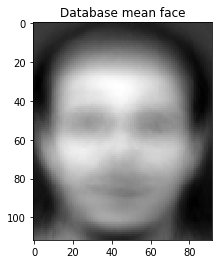

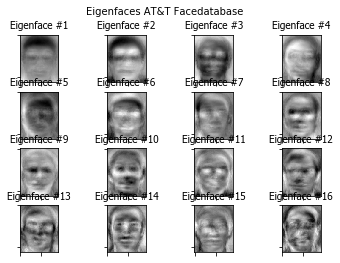

In [4]:
import os
import PIL.Image as Image
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Module with the purpose of READING THE DATABASE
# INPUT: 
# path=databse's file path
# sz= parameter for the possible reduction of the image dimension
# OUTPUT:
# Array of n matrices of dimensions [h,w]
def read_data(path, sz=None):
    # c is label referred to singular person
	c = 0
	X,y = [], []
    # os.walk creates a tree starting from the directory whose path is in the homonym variable
    # dirname will be this tree's root: database's directory
    # dirnames are the different subdirectories s1,s2,.. which represent different people
    # filenames are the singular images of every person 
	for dirname, dirnames, filenames in os.walk(path):
		for subdirname in dirnames:
            # changes the file's path by moving in the subdirectory
			subject_path = os.path.join(dirname, subdirname)
            # listdir is the list of the elements in the directory
			for filename in os.listdir(subject_path):
				try:
					im = Image.open(os.path.join(subject_path, filename))
					im = im.convert("L")
					# resize to given size (if given)
					if (sz is not None):
						im = im.resize(sz, Image.ANTIALIAS)
					X.append(np.asarray(im, dtype=np.uint8))
					y.append(c)
                                # Management of any errors
				except IOError:
					print ("I/O error({0}): {1}")
				except:
					print ("Unexpected error:", sys.exc_info()[0])
					raise
			c = c+1
	return [X,y]

def create_font(fontname='Tahoma', fontsize=10):
	return { 'fontname': fontname, 'fontsize':fontsize }

def subplot(title, images, rows, cols, sptitle="subplot", sptitles=[], colormap=cm.gray, ticks_visible=True, filename=None):
        # module useful to create the plots of the different eigenfaces and to show them in a sort of matrix made up by images
	fig = plt.figure()
	# main title
	fig.text(.5, .95, title, horizontalalignment='center') 
	for i in range(len(images)):
		ax0 = fig.add_subplot(rows,cols,(i+1))
		plt.setp(ax0.get_xticklabels(), visible=False)
		plt.setp(ax0.get_yticklabels(), visible=False)
		if len(sptitles) == len(images):
			plt.title("%s #%s" % (sptitle, str(sptitles[i])), create_font('Tahoma',10))
		else:
			plt.title("%s #%d" % (sptitle, (i+1)), create_font('Tahoma',10))
		plt.imshow(np.asarray(images[i]), cmap=colormap)
	if filename is None:
		plt.show()
	else:
		fig.savefig(filename)
        
def normalize(X, low, high, dtype=None):
        # Module which normalizes vectors
	X = np.asarray(X)
	minX, maxX = np.min(X), np.max(X)
	# normalize to [0...1].	
	X = X - float(minX)
	X = X / float((maxX - minX))
	# scale to [low...high].
	X = X * (high-low)
	X = X + low
	if dtype is None:
		return np.asarray(X)
	return np.asarray(X, dtype=dtype)


def primo(x):
    if(x   == 2): return True
    if(x%2 == 0): return False
    ultimo=int(np.sqrt(x))
    for i in range(3, ultimo+1,2):
        if(x%i == 0):
            return False
    return True

def factorize(num,sz=100):
    # This module is designed to factorize the dimensions of the images to be represented, so that they can be correctly reported in the plot   
    lista=[2]
    for i in range(3,sz+1,2):
        if (primo(i) == True):
            lista.append(i)
    x=num
    x1=1
    x2=1
    for j in lista:
        while (x%j==0):
            if (x==num):
                minfac=j
            x=x/j
            if (x1 <= x2):
                x1=x1*j
            else:
                x2=x2*j
    if (x1 > 2*x2):
        x1=x1/minfac
        x2=x2*minfac
    if (x2>x1):
        return x2,x1
    else:
        return x1,x2
    
def distanza(P,Q):
    # Module for the computation of Euclidean distance
    n=np.size(P)
    d=0
    for k in range(n):
        d=d+(P[k]-Q[k])**2
    d=np.sqrt(d)
    return d

# array of n matrices [h,w]
[X,y]=read_data("C:\\Users\\mario\\OneDrive\\Desktop\\Vero Plutone\\AT")
# n is the number of images
print("Database has been loaded")
n = np.size(X,0)
h = np.size(X,1)
w = np.size(X,2)

# x is an array of n vectorialized d-dimensional images, where d=h*w
x=np.empty((h*w,0))
for i in range(n):
    m=X[i].reshape(h*w,1)
    x=np.hstack((x,m))
x=np.array(x)

# Creation of the mean face
mu=np.mean(x,1)
mu=mu.reshape(h*w,1)
plt.imshow(mu.reshape(h,w),plt.cm.gray),plt.title('Database mean face');

# Principal Component Analisys
# Subtraction of the mean face from the faces
x=x-mu

# Costruction of the covariance matrix (1/n*np.dot(x,x.T))
C = np.dot(x.T,x)

# Eigenvectors and eigenvalues computation for symmetric matrices
autoval , autovett = np.linalg.eigh(C)
autoval=autoval/n
autovett = np.dot(x,autovett)

for i in range(n):
    autovett[:,i] = autovett[:,i]/np.linalg.norm(autovett[:,i])

# Eigenvectors and eigenvalues sorting
idx=np.argsort(-autoval)
autoval=autoval[idx]
autovett=autovett[:,idx]

# number of eigenvectors necessary for the representation of space
eps=0.86
valtot=0
for i in range(n):
    valtot=valtot+autoval[i]
somma=0
num=0
rapp=0
while ((rapp <= eps) and (num < n)):
    somma=somma+autoval[num]
    rapp=float(somma/valtot)
    num+=1
print("\n")
print("The number of autofaces generated is", num, "but only 16 of them are plotted below")
# base of the space autovett[:,:num]

import matplotlib.cm as cm

E = []
if primo(num)==True:
    x1,x2=factorize(num+1)
    num=num+1
else:
    x1,x2=factorize(num)
for i in range(16):
	e = autovett[:,i].reshape(X[0].shape)
	E.append(normalize(e,0,255))
# plot them and store the plot to "python_eigenfaces.pdf"
subplot(title="Eigenfaces AT&T Facedatabase", images=E, rows=4, cols=4, sptitle="Eigenface", colormap=cm.gray, filename="autofacce.pdf")

# CP is the matrix of projection coefficients
CP=np.zeros((num,n))
for k in range(num):
    for i in range(n):
        CP[k,i]=np.dot(autovett[:,k].T,x[:,i])

## <font color='#000080'>Facial recognition problem </font> <a id='Facial'></a>
Facial recognition was the source of motivation behind the creation of eigenfaces. For this use, eigenfaces have advantages over other techniques available, such as the system's speed and efficiency. As eigenface is primarily a dimension reduction method, a system can represent many subjects with a relatively small set of data. As a face recognition system it is also fairly invariant to large reductions in image sizing, however it begins to fail considerably when the variation between the seen images and probe image is large.

To recognise faces, gallery images, those seen by the system, are saved as collections of weights describing the contribution each eigenface has to that image. When a new face is presented to the system for classification, its own weights are found by projecting the image onto the collection of eigenfaces. This provides a set of weights describing the probe face. These weights are then classified against all weights in the gallery set to find the closest match. A nearest neighbour method is a simple approach for finding the Euclidean distance between two vectors, where the minimum can be classified as the closest subject.

Intuitively, recognition process with eigenface method is to project query images into the face-space spanned by eigenfaces we have calculated and in that face-space find the closest match to a face class.
The various steps of the process can be summarized in the following points.

•Given input image vector $\underline{U}\in \mathbb{R}^{d}=\mathbb{R}^{h \cdot w}$, the mean image vector from the database $\underline{\Psi}$, calculate the weight of the kth eigenface as:
$w_{k}=\underline{V}_{k}^{T}(\underline{U}-\underline{\Psi})$, then form a weight vector $\underline{W}=[w_{1},w_{2},...,w_{k},...,w_{n}]$.

•Compare $\underline{W}$ with weight vectors $\underline{W}_{m}$ of images in the database. Find the minimum Euclidean distance 
$D=\min_{m=1:n}||\underline{W}-\underline{W}_{m}||$.<br><a id='theta1'></a><a id='theta2'></a>
If $D<\theta _{1}$, then the mth entry in the database is the best candidate of recognition.<br> 
If $\theta _{1} \leq D \leq \theta _{2}$, then $\underline{U}$ may be an unknown face and can be added to the database.<br>
If $D>\theta _{2}$,$\underline{U}$ is not a face image.

## <font color='red'> Code II: facial recognition <a id='Code2'></a>

Some useful path:
C:\Users\HOME\Desktop\Progetto Plutone\albero2.pgm
C:\Users\HOME\Desktop\Progetto Plutone\prova1.pgm
C:\Users\HOME\Desktop\Progetto Plutone\AT\s03\4.pgm


Please insert the path of the file tried to recognize: C:\Users\mario\OneDrive\Desktop\Vero Plutone\AT\s03\4.pgm


The minimun distance calculated is:  8.462117271806622e-13
The image has been recognised as one of the database,
in particular it has been seen as a picture of the individual: s 3


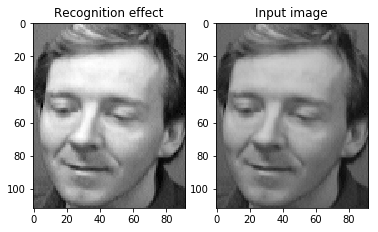

In [8]:
print("Some useful path:")
print("C:\\Users\\HOME\\Desktop\\Progetto Plutone\\albero2.pgm")
print("C:\\Users\\HOME\\Desktop\\Progetto Plutone\\prova1.pgm")
print("C:\\Users\\HOME\\Desktop\\Progetto Plutone\\AT\\s03\\4.pgm")
print('\n')
user_path=input("Please insert the path of the file tried to recognize: ")
U=[]
try:
    im = Image.open(user_path)
    im = im.convert("L")
    U.append(np.asarray(im, dtype=np.uint8))
    # Management of any errors
except IOError:
	print ("I/O error({0}): {1}")
except:
	print ("Unexpected error:", sys.exc_info()[0])
	raise
U=np.array(U[0])
U=U.reshape(h*w,1)
U=U-mu

# Projection of the new image
NP=np.zeros((num,1))
for k in range(num):
        NP[k]=np.dot(autovett[:,k].T,U)

# Euclidean distance is used
# d is the array of distances
d=np.zeros(n)
for i in range(n):
    d[i]=distanza(NP,CP[:,i])
dmin=np.amin(d)
index=np.argmin(d)
print("\n")
print("The minimun distance calculated is: ", dmin)

teta1=3225
teta2=5486
if (dmin<teta1):
    print("The image has been recognised as one of the database,")
    print("in particular it has been seen as a picture of the individual: s", int(index/10)+1)
    
    plt.figure();
    plt.subplot(121),plt.imshow(X[index], plt.cm.gray),plt.title('Recognition effect');
    plt.subplot(122),plt.imshow(im, plt.cm.gray),plt.title('Input image');
    plt.show()           
else:
    if (dmin > teta1 and dmin < teta2):
        print("The image has been recognised as one of a face absent in the database.")
    else:
        print("The image doesn't represent a face, in the enstablished terms.")
    plt.figure();
    plt.imshow(im, plt.cm.gray),plt.title('Input image');
    plt.show()


 ## <font color='#000080'> Different executions of CodeII </font> <a id='Code2esecuzio'></a>
 The following executions are obtained with the codes below by loading a reduced database, whose nature is specified in the following section.
![Alt text](https://i.ibb.co/b30GWg0/Riconoscimenti-vari.png)

## <font color='#000080'>Estimation of parameters [$\varepsilon$](#Epsilon), [$\theta_1$](#theta1) and [$\theta_2$](#theta2) </font> <a id='Estimation'></a>
The first parameter we need to experimentally estimate is the parameter [$\varepsilon$](#Epsilon), whose role is to enstablish the number of principal component we want to analyze, and so the number of eigenfaces that will be generated.<br>
First of all, due the huge number of images of different people in the database we've used ($10$ different images for each person among $40$ people, with a total of $400$ images) we decided to work only on one representative for each class, chosen as the first picture in it, for a total of $40$ representatives.<br>
So we projected these images (minus the mean face) into the eigenfaces' space (obtaining ghostfaces) by varying the number of principal components (so the dimension of the space), and studied how much the projections were similar to original pictures, quantifying this property with the $Peak \ Signal \ to \ Noise \ Ratio \ (\mathbf{PSNR})$, defined as <br>
\begin{equation}PSNR=10 \log_{10}\left[\dfrac{(max.range)^2}{Root \ mean \ square \ error}\right].
\end{equation}

The [$\mathbf{Figure\ 4.1}$](#Fig4.1) shows some of the representatives and respective projections, while respective $\mathbf{PSNR}$ values're reported in the [$\mathbf{Table\ 4.1}$](#Tab4.1). (The other ones can be obtained with the [$\mathbf{Code \ III}$](#Code3)).
<a id='Fig4.1'></a>
![Alt text](https://i.ibb.co/Sf0rL86/Representatives.png)

<a id='Tab4.1'></a>
<h2 style='padding: 1px'>PSNR value for images of $\mathbf{Figure\ 4.1}$</h2><table class='table table-striped'> <thead> <tr> <th>Number of the representative</th> <th>Peak signal to noise ratio (decibel)</th></tr> </thead> <tbody> <tr> <th scope='row'>1</th> <td>29.276917414147245</td></tr> <tr> <th scope='row'>10</th> <td>28.494872275215442</td> </tr> <tr> <th scope='row'>20</th> <td>31.033526565646966</td> </tr> <th scope='row'>26</th> <td>27.696940677413693 </td></tr><tr> <th scope='row'>30</th> <td>28.30163368244432</td> </tr> <th scope='row'>40</th> <td>27.357902220646796</td> </tr>
</tbody> </table>




Lastly, in order to have a significant result, and with the aim of defing the best suitable value of $\mathbf{PSNR}$, we observed some of the plot of "reduced representaive" and enstablished that the most suitable value of peak signal to noise ratio for our database was 27-30 decibel.<br>
In this way we were able to enstablish that, in order to obtain significant results, we had to choose about $75$ principal components, with [$\varepsilon$](#Epsilon)$=0.86$.

## <font color='red'> Code III: estimation of parameter [$\varepsilon$](#Epsilon) <a id='Code3'></a>



The estimated epslion is 0.8608214343749423




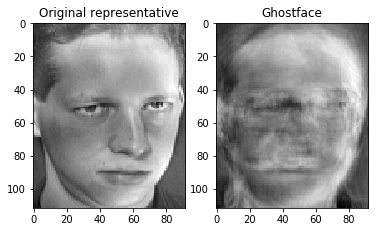

The 'Peak sign to noise ratio' is  29.276917414147206 decibel




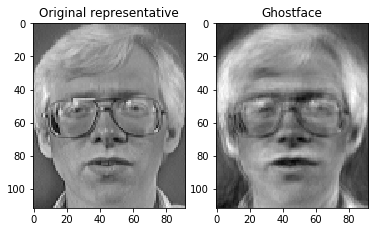

The 'Peak sign to noise ratio' is  27.27132999787512 decibel




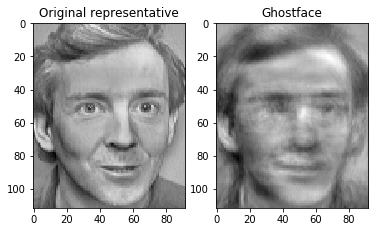

The 'Peak sign to noise ratio' is  27.92357480899046 decibel




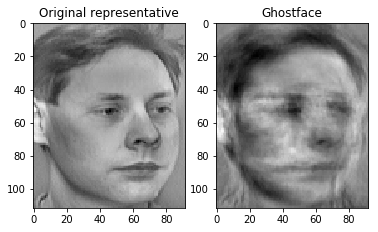

The 'Peak sign to noise ratio' is  28.735728001684933 decibel




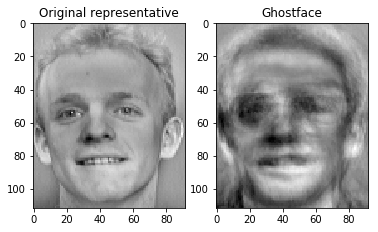

The 'Peak sign to noise ratio' is  27.243016922466573 decibel




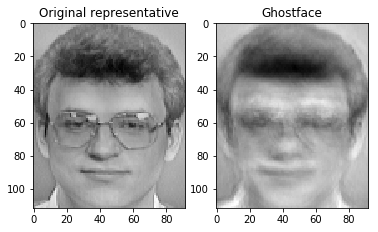

The 'Peak sign to noise ratio' is  30.28857325216044 decibel




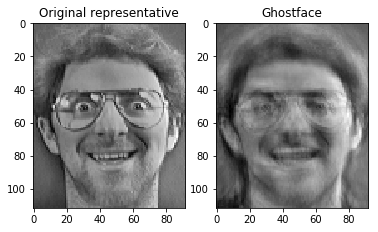

The 'Peak sign to noise ratio' is  29.196889814842493 decibel




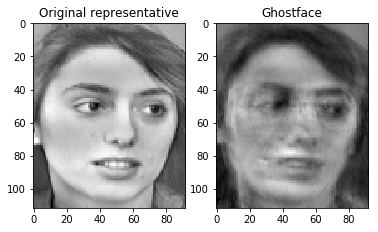

The 'Peak sign to noise ratio' is  29.501067225055802 decibel




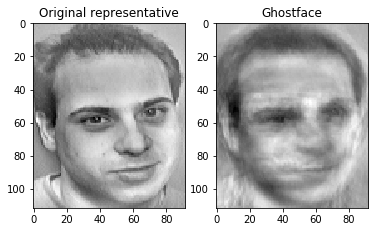

The 'Peak sign to noise ratio' is  29.64838794030249 decibel




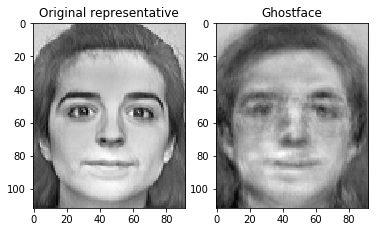

The 'Peak sign to noise ratio' is  28.494872275215467 decibel




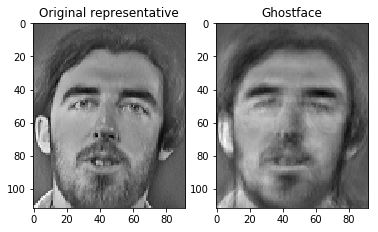

The 'Peak sign to noise ratio' is  29.20187465940365 decibel




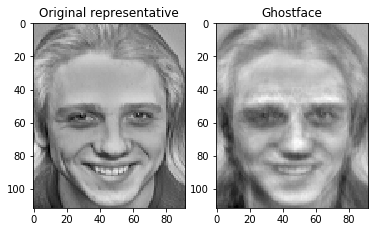

The 'Peak sign to noise ratio' is  28.742158426036962 decibel




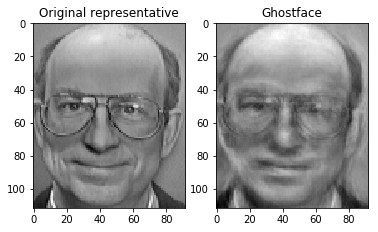

The 'Peak sign to noise ratio' is  29.479032958501822 decibel




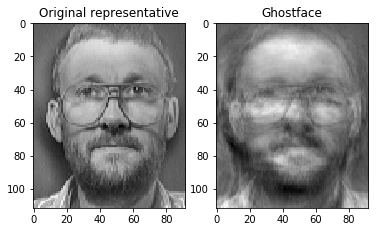

The 'Peak sign to noise ratio' is  29.227879680548703 decibel




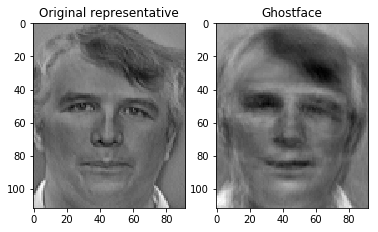

The 'Peak sign to noise ratio' is  29.610514402389477 decibel




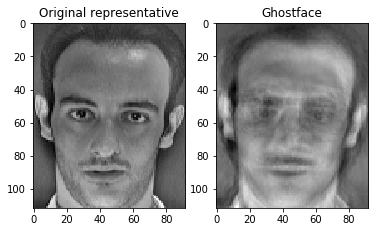

The 'Peak sign to noise ratio' is  28.856708096253637 decibel




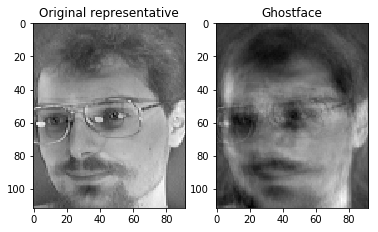

The 'Peak sign to noise ratio' is  31.225674376834007 decibel




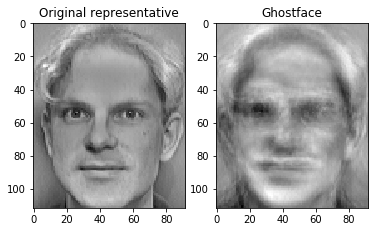

The 'Peak sign to noise ratio' is  27.68377427386499 decibel




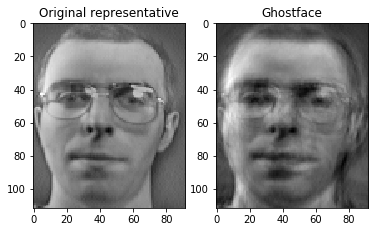

The 'Peak sign to noise ratio' is  31.020307218710748 decibel




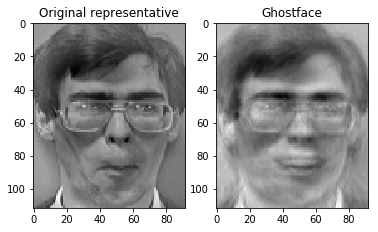

The 'Peak sign to noise ratio' is  31.03352656564696 decibel




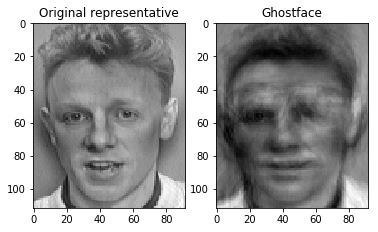

The 'Peak sign to noise ratio' is  28.768731237527447 decibel




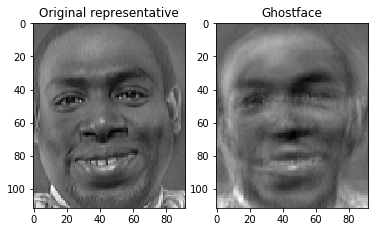

The 'Peak sign to noise ratio' is  29.06035596865774 decibel




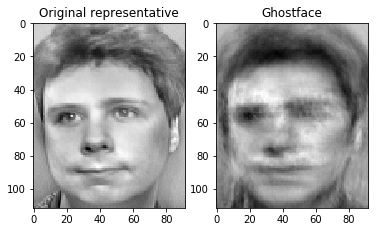

The 'Peak sign to noise ratio' is  26.92920798040262 decibel




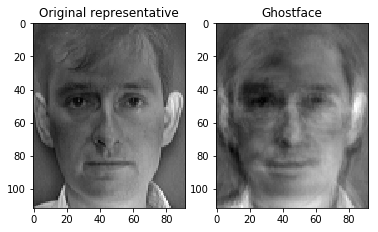

The 'Peak sign to noise ratio' is  29.735105484923373 decibel




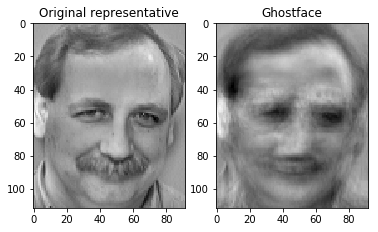

The 'Peak sign to noise ratio' is  28.47815401809928 decibel




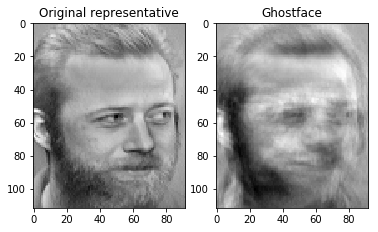

The 'Peak sign to noise ratio' is  27.69694067741369 decibel




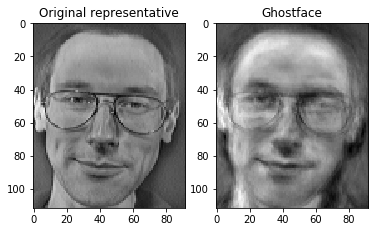

The 'Peak sign to noise ratio' is  27.65561176567779 decibel




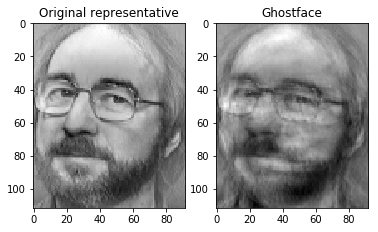

The 'Peak sign to noise ratio' is  30.26063774854634 decibel




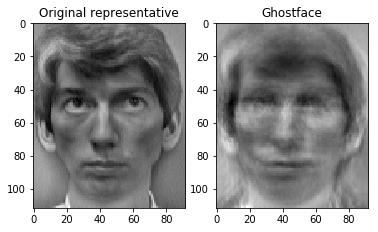

The 'Peak sign to noise ratio' is  29.461624662091367 decibel




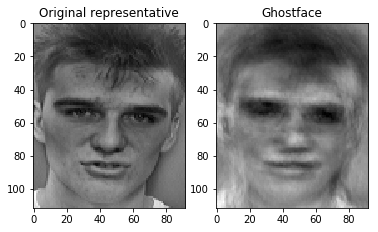

The 'Peak sign to noise ratio' is  28.301633682444333 decibel




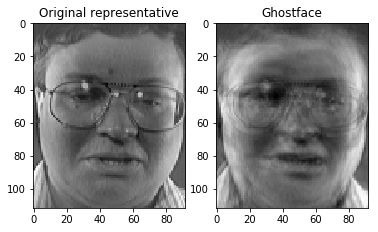

The 'Peak sign to noise ratio' is  29.48969721776466 decibel




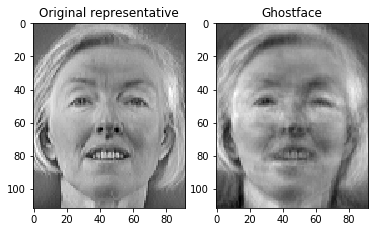

The 'Peak sign to noise ratio' is  28.927965046090137 decibel




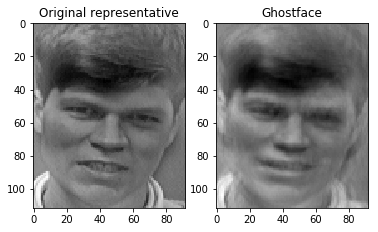

The 'Peak sign to noise ratio' is  31.847407895110493 decibel




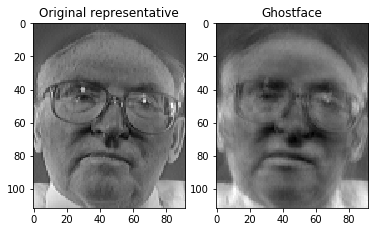

The 'Peak sign to noise ratio' is  30.497577620363113 decibel




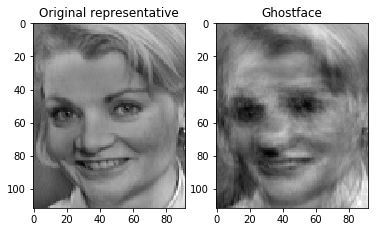

The 'Peak sign to noise ratio' is  29.602096163993977 decibel




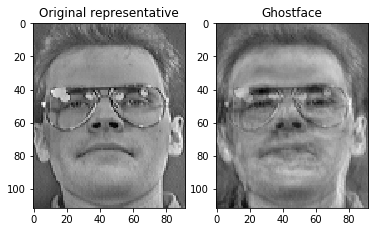

The 'Peak sign to noise ratio' is  29.97150017494195 decibel




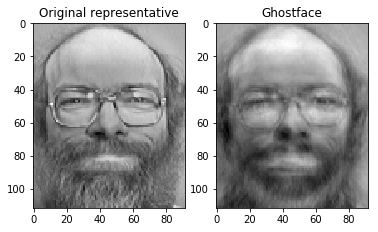

The 'Peak sign to noise ratio' is  28.293321847407192 decibel




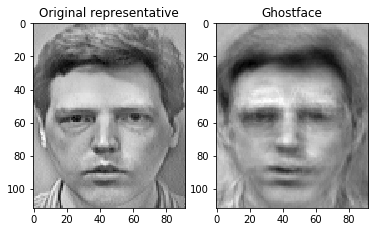

The 'Peak sign to noise ratio' is  28.60934875307409 decibel




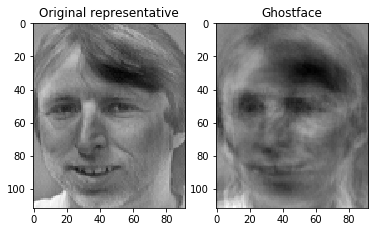

The 'Peak sign to noise ratio' is  30.358260021906084 decibel




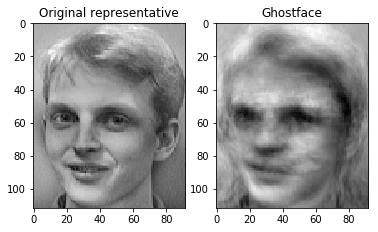

The 'Peak sign to noise ratio' is  27.357902220646775 decibel




In [10]:
import numpy as np
import os
import PIL.Image as Image
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
 # Module for the computation of minumum square error for two matrices
def mse(A,B):
    D=np.abs(A-B)
    D=D**2
    D=np.array(D)
    MSE=sum(sum(D))/np.size(D)
    MSE=np.sqrt(MSE)
    MSE=MSE
    return MSE
     
# Module for the computation of "Peak signal to noise ratio"
def PSRN(A,B):
    return 10*np.log10(np.max(np.abs(A))**2/mse(A,B))

def read_data(path, sz=None):
    # c is label referred to singular person
	c = 0
	X,y = [], []
    # os.walk creates a tree starting from the directory whose path is in the homonym variable
    # dirname will be this tree's root: database's directory
    # dirnames are the different subdirectories s1,s2,.. which represent different people
    # filenames are the singular images of every person 
	for dirname, dirnames, filenames in os.walk(path):
		for subdirname in dirnames:
            # changes the file's path by moving in the subdirectory
			subject_path = os.path.join(dirname, subdirname)
            # listdir is the list of the elements in the directory
			for filename in os.listdir(subject_path):
				try:
					im = Image.open(os.path.join(subject_path, filename))
					im = im.convert("L")
					# resize to given size (if given)
					if (sz is not None):
						im = im.resize(sz, Image.ANTIALIAS)
					X.append(np.asarray(im, dtype=np.uint8))
					y.append(c)
                                # Management of any errors
				except IOError:
					print ("I/O error({0}): {1}")
				except:
					print ("Unexpected error:", sys.exc_info()[0])
					raise
			c = c+1
	return [X,y]
 
# array of n matrices [h,w]
[X,y]=read_data("C:\\Users\\HOME\\Desktop\\Progetto Plutone\\AT")
# n is the number of images
n = np.size(X,0)
h = np.size(X[0],0)
w = np.size(X[0],1)
c=np.max(y)
 
# x is an array of n vectorialized d-dimensional images, where d=h*w
x=np.empty((h*w,0))
for i in range(n):
    m=X[i].reshape(h*w,1)
    x=np.hstack((x,m))
x=np.array(x)
 
# Creation of the mean face
mu=np.mean(x,1)
mu=mu.reshape(h*w,1)
 
# Principal Component Analisys
# Subtraction of the mean face from the faces
x=x-mu
 
# Costruction of the covariance matrix (1/n*np.dot(x,x.T))
C = np.dot(x.T,x)
 
# Eigenvectors and eigenvalues computation for symmetric matrices
autoval , autovett = np.linalg.eigh(C)
autoval=autoval/n
autovett = np.dot(x,autovett)
 
for i in range(n):
    autovett[:,i] = autovett[:,i]/np.linalg.norm(autovett[:,i])
 
# Eigenvectors and eigenvalues sorting
idx=np.argsort(-autoval)
autoval=autoval[idx]
autovett=autovett[:,idx]
 
valtot=0
for i in range(n):
    valtot=valtot+autoval[i]
somma=0
num=0
k=75
while (num < k):
    somma=somma+autoval[num]
    num+=1
eps2=float(somma/valtot)
print('\n')
print("The estimated epslion is", eps2)
print('\n')

# CP is the matrix of projection coefficients
CP=np.zeros((num,n))
for k in range(num):
    for i in range(n):
        CP[k,i]=np.dot(autovett[:,k].T,x[:,i])
 
#representatives' ghostfaces
for s in range(40):       
     f=int(s*10)
     pro=np.zeros(h*w)
     for j in range(num):
         pro=pro+((CP[j][f])*autovett[:,j])
     decibel=PSRN(pro.reshape(112,92),x[:,f].reshape(112,92))
     plt.figure();
     plt.subplot(121),plt.imshow(x[:,f].reshape(112,92),cmap=cm.gray),plt.title('Original representative');
     plt.subplot(122),plt.imshow(pro.reshape(112,92),cmap=cm.gray),plt.title('Ghostface');
     plt.show()
     print("The 'Peak sign to noise ratio' is ", decibel, "decibel")
     print("\n")

For the estimation of the parameters [$\theta_1$](#theta1) and [$\theta_2$](#theta2) instead we've chosen three different databases $\mathcal{D_1}, \ \mathcal{D_2}, \ \mathcal{D_3} $: the first one made up by one representative for each class, the second one composed by $80$ images of people not present in the first database and the last composed by images which didn't represent human faces.([$\mathbf{Figure\ 4.2.1}$](#Fig4.2), [$\mathbf{Figure\ 4.2.2}$](#Fig4.2), [$\mathbf{Figure\ 4.2.3}$](#Fig4.2) show same images taken from the databases $\mathcal{D_1}, \ \mathcal{D_2}, \ \mathcal{D_3} $)<br>


<a id='Fig4.2'></a>
![Alt text](https://i.ibb.co/KF9hfqB/Figure-Theta.png)




The first step has been the projection into the eigenspace of $\mathcal{D_1}$'s images, followed by the computation of the distances vector, whose maximum would be referred to as $\tilde{\theta_1}$; the same thing has been done also for $\mathcal{D_2}$, whose minimum and maximum would be called $\tilde{\theta_{2m}}$ and $\tilde{\theta_{2M}}$, while for $\mathcal{D_3}$ the minimum was called $\tilde{\theta_3}$.<br>
Once this parameter had been defined, the parameters [$\theta_1$](#theta1) and [$\theta_2$](#theta2) where calculated as follow
\begin{equation}\theta_1=\dfrac{\tilde{\theta_1}+\tilde{\theta_{2m}}}{2}\;\;\;\;\;\;\;\; \theta_2=\dfrac{\tilde{\theta_3}+\tilde{\theta_{2M}}}{2}. \end{equation}
The results of these operations are reported in the [$\mathbf{Table\ 4.2.1}$](#Tab4.2.1).


<a id='Tab4.2.1'></a>
<h2 style='padding: 1px'>Different parameters for $\mathcal{D_1}, \ \mathcal{D_2}, \ \mathcal{D_3} $ databases</h2><table class='table table-striped'> <thead> <tr> <th>$\tilde{\theta_1}$</th> <th>3107.582625466231</th> <th>$\theta_1$</th> </tr> </thead> <tbody> <tr> <th scope='row'>$\tilde{\theta_{2m}}$</th> <td>3341.824697834979</td> <td>3224.7036616506048</td> </tr>  <tr> <th scope='row'>$\tilde{\theta_{2M}}$</th> <td>7656.256357020245</td> <td>$\theta_2$</td>  </tr>  <tr> <th scope='row'>$\tilde{\theta_{3}}$</th> <td>3341.824697834979</td> <td>5485.181034860267</td> 
</tbody> </table>

## <font color='red'> Code IV: estimation of parameters [$\theta_1$](#theta1) and [$\theta_2$](#theta2) <a id='Code4'></a>

In [7]:
import os
import PIL.Image as Image
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Module with the purpose of READING THE DATABASE
# INPUT: 
# path=databse's file path
# sz= parameter for the possible reduction of the image dimension
# OUTPUT:
# Array of n matrices of dimensions [h,w]
def read_data(path, sz=None):
    # c is label referred to singular person
	c = 0
	X,y = [], []
    # os.walk creates a tree starting from the directory whose path is in the homonym variable
    # dirname will be this tree's root: database's directory
    # dirnames are the different subdirectories s1,s2,.. which represent different people
    # filenames are the singular images of every person 
	for dirname, dirnames, filenames in os.walk(path):
		for subdirname in dirnames:
            # changes the file's path by moving in the subdirectory
			subject_path = os.path.join(dirname, subdirname)
            # listdir is the list of the elements in the directory
			for filename in os.listdir(subject_path):
				try:
					im = Image.open(os.path.join(subject_path, filename))
					im = im.convert("L")
					# resize to given size (if given)
					if (sz is not None):
						im = im.resize(sz, Image.ANTIALIAS)
					X.append(np.asarray(im, dtype=np.uint8))
					y.append(c)
                                # Management of any errors
				except IOError:
					print ("I/O error({0}): {1}")
				except:
					print ("Unexpected error:", sys.exc_info()[0])
					raise
			c = c+1
	return [X,y]

def create_font(fontname='Tahoma', fontsize=10):
	return { 'fontname': fontname, 'fontsize':fontsize }

def subplot(title, images, rows, cols, sptitle="subplot", sptitles=[], colormap=cm.gray, ticks_visible=True, filename=None):
        # module useful to create the plots of the different eigenfaces and to show them in a sort of matrix made up by images
	fig = plt.figure()
	# main title
	fig.text(.5, .95, title, horizontalalignment='center') 
	for i in range(len(images)):
		ax0 = fig.add_subplot(rows,cols,(i+1))
		plt.setp(ax0.get_xticklabels(), visible=False)
		plt.setp(ax0.get_yticklabels(), visible=False)
		if len(sptitles) == len(images):
			plt.title("%s #%s" % (sptitle, str(sptitles[i])), create_font('Tahoma',10))
		else:
			plt.title("%s #%d" % (sptitle, (i+1)), create_font('Tahoma',10))
		plt.imshow(np.asarray(images[i]), cmap=colormap)
	if filename is None:
		plt.show()
	else:
		fig.savefig(filename)
        
def normalize(X, low, high, dtype=None):
        # Module which normalizes vectors
	X = np.asarray(X)
	minX, maxX = np.min(X), np.max(X)
	# normalize to [0...1].	
	X = X - float(minX)
	X = X / float((maxX - minX))
	# scale to [low...high].
	X = X * (high-low)
	X = X + low
	if dtype is None:
		return np.asarray(X)
	return np.asarray(X, dtype=dtype)

def eigenspace(X, number=None):
    # number rappresents the number of eigenvector we want to consider
    # if it is None the program compute an "optimal" number.
    n = np.size(X,0)
    h = np.size(X[0],0)
    w = np.size(X[0],1)
    
    # x is an array of n vectorialized d-dimensional images, where d=h*w
    x=np.empty((h*w,0))
    for i in range(n):
        m=X[i].reshape(h*w,1)
        x=np.hstack((x,m))
    x=np.array(x)
    
    # Creation of the mean face
    mu=np.mean(x,1)
    mu=mu.reshape(h*w,1)
    
    # Principal Component Analisys
    # Subtraction of the mean face from the faces
    x=x-mu
    
    # Costruction of the covariance matrix (1/n*np.dot(x,x.T))
    C = np.dot(x.T,x)
    
    # Eigenvectors and eigenvalues computation for symmetric matrices
    autoval , autovett = np.linalg.eigh(C)
    autoval=autoval/n
    autovett = np.dot(x,autovett)
    
    for i in range(n):
        autovett[:,i]= autovett[:,i]/np.linalg.norm(autovett[:,i])
    
    # Eigenvectors and eigenvalues sorting
    idx=np.argsort(-autoval)
    autoval=autoval[idx]
    autovett=autovett[:,idx]
        
    if(number==None):
    # number of eigenvectors necessary for the representation of space
    # in accord with the theory
        eps=0.86
        valtot=0
        for i in range(n):
            valtot=valtot+autoval[i]
        somma=0
        num=0
        rapp=0
        while ((rapp <= eps) and (num < n)):
            somma=somma+autoval[num]
            rapp=float(somma/valtot)
            num+=1
    else:
        num=number
    
    # base of the space autovett[:,:num]
    
    CP=np.empty((num,0))
    for i in range(n):
        a=np.dot(autovett[:,0:num].T,x[:,i].reshape(h*w,1))
        CP=np.hstack((CP,a))
 
    return mu,autovett[:,0:num],CP


def distance(U,mu,autovett,CP):
    num=np.size(autovett,1)
    U=np.array(U)
    U=U.reshape(np.size(U),1)
    U=U-mu
    
    # Projection of the new image
    NP=np.zeros((num,1))
    NP=np.dot(autovett[:,0:num].T,U)
    NP=NP.reshape(num)
    # Euclidean distance is used
    # d is the array of distances

    d=np.zeros(np.size(CP,1))
    for i in range(np.size(CP,1)):
        d[i]=np.linalg.norm(NP.T-CP[:,i])
    dmin=np.amin(d)
    index=np.argmin(d)
    
    return dmin,index,NP

def recognition(U,mu,autovett,CP,theta1=3225,theta2=5485):
    # The output of the function is:
    # 0 is a face present in the database 
    # 1 is a face absent in the database
    # 2 if it's not a face
    dmin,index,NP=distance(U,mu,autovett,CP)
    if(dmin<=theta1):
        return 0,dmin,index    
    elif(theta1<dmin<=theta2):
        return 1,dmin,index
    else:
        return 2,dmin,index
        
    
def reconstruct(NP,autovett,mu):
    n=np.size(autovett,0)
    h=np.size(autovett,1)
    rec=np.array(np.zeros(n))
    for j in range(h):
        rec=rec+NP[j]*autovett[:,j]
    return rec+mu.T

def theta(Imm,mu,autovett,CP,flag=None):
    # Imm is a list of matrices of the images 
    # if flag==None only essential values thetamin e thetamax are returned
    # otherwise all the indexes are returned ad an output 
    n=np.size(Imm,0)
    all_dist=[]
    all_index=[]
    j=0
    while(j<n):
        E=[]
        E.append(Imm[j])
        dmin,index,NP=distance(Imm[j],mu,autovett,CP)
        all_dist.append(dmin)
        all_index.append(index)
        j=j+1
#    thetamin=np.amin(all_dist)
#    thetamax=np.amax(all_dist)
        thetamin=np.amin(all_dist)
        thetamax=np.amax(all_dist)
    if(flag==None):
        return thetamin,thetamax
    else:
        return thetamin,thetamax,all_dist,all_index

# Main
user_path="C:\\Users\\HOME\\Desktop\\Plutone3\\DEigenSpace"
[X,y]=read_data(user_path)


mu,autovett,CP=eigenspace(X)

user_path=[]

user_path.append("C:\\Users\\HOME\\Desktop\\Plutone3\\DKnownTest")
user_path.append("C:\\Users\\HOME\\Desktop\\Plutone3\\DFaceNotKnownTheta")
user_path.append("C:\\Users\\HOME\\Desktop\\Plutone3\\DThingsTheta")

 
thetamin=np.zeros(3)
thetamax=np.zeros(3)
for i in range(3):
    [Y,y]=read_data(user_path[i])
    # plt.figure();
    # plt.imshow(Y[10], cmap=cm.gray)
    thetamin[i],thetamax[i],all_dist,all_index=theta(Y,mu,autovett,CP,1)
THETA1=(thetamax[0]+thetamin[1])/2
THETA2=(thetamax[1]+thetamin[2])/2    

print("\n Theta1= ",THETA1,"\n Theta2= ", THETA2)


 Theta1=  3224.7036616506048 
 Theta2=  5485.181034860267


## <font color='#000080'>Testing Phase: precision, recall and confusion matrix</font>  <a id='test'></a>
Lastly we tested the previous codes with another database $\mathcal{D}_{test}$ in order to quantify the precision of the algorithm used.<br>
In particular we counted the number of true positives, false positives (i.e. images that didn't represent a face but were recognized as faces), of false negatives (i.e images that represented a face but were not recognized as faces) and compared them to the total number of recognition attemps.<br>
The database $\mathcal{D}_{test}$ contains $40$ images of faces of people present in the database $\mathcal{D}_{eig}$ used to build eigenspace, $40$ are images of faces of people absent from $\mathcal{D}_{eig}$ e $26$ are images of object which are not human faces.<br> 
The results of these operations are reported in the [$\mathbf{Table\ 5.1}$](#Tab5.1), while the [$\mathbf{Figure\ 5.1}$](#Fig5.1) shows the sense of the parameters we need to analyse.

![Alt text](https://i.ibb.co/6Yfp638/Ciao-ciao.png)<a id='Fig5.1'></a>


In particular we give importance to the following terms:<br>
1. number of true positive<br>
2. number of false negative<br>
3. number of false positive<br>

<a id='Tab5.1'></a>
<h2 style='padding: 1px'>Confusion matrix for test on $\mathcal{D}_{test}$ database</h2><table class='table table-striped'> <thead> <tr> <th>Confusion matrix</th> <th>Pred. faces in database</th> <th>Pred. faces not in database</th> <th>Pred. not faces</th> </tr> </thead> <tbody> <tr> <th scope='row'>Real faces in database (40)</th> <td>40</td> <td>0</td> <td>0</td> </tr>  <tr> <th scope='row'>Real faces not in database (40)</th> <td>0</td> <td>15</td> <td>25</td>  </tr>  <tr> <th scope='row'>Real not faces (26)</th> <td>0</td> <td>3</td> <td>23</td>
</tbody> </table>

Lastly we calculated some important parameters, which summarize the informations in [$\mathbf{Table\ 5.1}$](#Tab5.1), reported in [$\mathbf{Table\ 5.2}$](#Tab5.2).<br>
1. True positive rate (Recall, sensitivity, hit rate): $\mathbf{TPR}=\dfrac{TP}{TP+FN}$<br>

2. Positive predictive value (Precision): $\mathbf{PPV}=\dfrac{TP}{TP+FP}$<br>

<a id='Tab5.2'></a>
<h2 style='padding: 1px'>True positive rate and positive predictive value</h2><table class='table table-striped'> <thead> <tr> <th></th> <th>$\mathbf{TPR}$</th> <th>$\mathbf{PPV}$</th> </tr> </thead> <tbody> <tr> <th scope='row'>Faces in database </th> <td>1</td> <td>1</td> </tr>  <tr> <th scope='row'>Faces not in database</th> <td>0.375</td> <td>0.8333</td> </tr>  <tr> <th scope='row'>Not faces</th> <td>0.885</td> <td>0.479</td>
</tbody> </table>

So with the values reported in [$\mathbf{Table\ 5.2}$](#Tab5.2) we can calculate the mean values for $\mathbf{TPR}$ and $\mathbf{PPV}$.<br>

$\mathbf{TPR}_{mean}=\dfrac{1+0.375+0.885}{3}=0.7533 \; \; \; \; \;$ $\; \; \; \; \; \mathbf{PPV}_{mean}=\dfrac{1+0.479+0.833}{3}=0.7707$<br>



## <font color='red'> Code V: testing phase<a id='Code5'></a>

In [3]:
import os
import PIL.Image as Image
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Module with the purpose of READING THE DATABASE
# INPUT: 
# path=databse's file path
# sz= parameter for the possible reduction of the image dimension
# OUTPUT:
# Array of n matrices of dimensions [h,w]
def read_data(path, sz=None):
    # c is label referred to singular person
	c = 0
	X,y = [], []
    # os.walk creates a tree starting from the directory whose path is in the homonym variable
    # dirname will be this tree's root: database's directory
    # dirnames are the different subdirectories s1,s2,.. which represent different people
    # filenames are the singular images of every person 
	for dirname, dirnames, filenames in os.walk(path):
		for subdirname in dirnames:
            # changes the file's path by moving in the subdirectory
			subject_path = os.path.join(dirname, subdirname)
            # listdir is the list of the elements in the directory
			for filename in os.listdir(subject_path):
				try:
					im = Image.open(os.path.join(subject_path, filename))
					im = im.convert("L")
					# resize to given size (if given)
					if (sz is not None):
						im = im.resize(sz, Image.ANTIALIAS)
					X.append(np.asarray(im, dtype=np.uint8))
					y.append(c)
                                # Management of any errors
				except IOError:
					print ("I/O error({0}): {1}")
				except:
					print ("Unexpected error:", sys.exc_info()[0])
					raise
			c = c+1
	return [X,y]

def create_font(fontname='Tahoma', fontsize=10):
	return { 'fontname': fontname, 'fontsize':fontsize }

def subplot(title, images, rows, cols, sptitle="subplot", sptitles=[], colormap=cm.gray, ticks_visible=True, filename=None):
        # module useful to create the plots of the different eigenfaces and to show them in a sort of matrix made up by images
	fig = plt.figure()
	# main title
	fig.text(.5, .95, title, horizontalalignment='center') 
	for i in range(len(images)):
		ax0 = fig.add_subplot(rows,cols,(i+1))
		plt.setp(ax0.get_xticklabels(), visible=False)
		plt.setp(ax0.get_yticklabels(), visible=False)
		if len(sptitles) == len(images):
			plt.title("%s #%s" % (sptitle, str(sptitles[i])), create_font('Tahoma',10))
		else:
			plt.title("%s #%d" % (sptitle, (i+1)), create_font('Tahoma',10))
		plt.imshow(np.asarray(images[i]), cmap=colormap)
	if filename is None:
		plt.show()
	else:
		fig.savefig(filename)
        
def normalize(X, low, high, dtype=None):
        # Module which normalizes vectors
	X = np.asarray(X)
	minX, maxX = np.min(X), np.max(X)
	# normalize to [0...1].	
	X = X - float(minX)
	X = X / float((maxX - minX))
	# scale to [low...high].
	X = X * (high-low)
	X = X + low
	if dtype is None:
		return np.asarray(X)
	return np.asarray(X, dtype=dtype)

def eigenspace(X, number=None):
    # number rappresents the number of eigenvector we want to consider
    # if it is None the program compute an "optimal" number.
    n = np.size(X,0)
    h = np.size(X[0],0)
    w = np.size(X[0],1)
    
    # x is an array of n vectorialized d-dimensional images, where d=h*w
    x=np.empty((h*w,0))
    for i in range(n):
        m=X[i].reshape(h*w,1)
        x=np.hstack((x,m))
    x=np.array(x)
    
    # Creation of the mean face
    mu=np.mean(x,1)
    mu=mu.reshape(h*w,1)
    
    # Principal Component Analisys
    # Subtraction of the mean face from the faces
    x=x-mu
    
    # Costruction of the covariance matrix (1/n*np.dot(x,x.T))
    C = np.dot(x.T,x)
    
    # Eigenvectors and eigenvalues computation for symmetric matrices
    autoval , autovett = np.linalg.eigh(C)
    autoval=autoval/n
    autovett = np.dot(x,autovett)
    
    for i in range(n):
        autovett[:,i]= autovett[:,i]/np.linalg.norm(autovett[:,i])
    
    # Eigenvectors and eigenvalues sorting
    idx=np.argsort(-autoval)
    autoval=autoval[idx]
    autovett=autovett[:,idx]
        
    if(number==None):
    # number of eigenvectors necessary for the representation of space
    # in accord with the theory
        eps=0.86
        valtot=0
        for i in range(n):
            valtot=valtot+autoval[i]
        somma=0
        num=0
        rapp=0
        while ((rapp <= eps) and (num < n)):
            somma=somma+autoval[num]
            rapp=float(somma/valtot)
            num+=1
    else:
        num=number
    
    # base of the space autovett[:,:num]
    
    CP=np.empty((num,0))
    for i in range(n):
        a=np.dot(autovett[:,0:num].T,x[:,i].reshape(h*w,1))
        CP=np.hstack((CP,a))
 
    return mu,autovett[:,0:num],CP


def distance(U,mu,autovett,CP):
    num=np.size(autovett,1)
    U=np.array(U)
    U=U.reshape(np.size(U),1)
    U=U-mu
    
    # Projection of the new image
    NP=np.zeros((num,1))
    NP=np.dot(autovett[:,0:num].T,U)
    NP=NP.reshape(num)
    # Euclidean distance is used
    # d is the array of distances

    d=np.zeros(np.size(CP,1))
    for i in range(np.size(CP,1)):
        d[i]=np.linalg.norm(NP.T-CP[:,i])
    dmin=np.amin(d)
    index=np.argmin(d)
    
    return dmin,index,NP

def recognition(U,mu,autovett,CP,theta1=3225,theta2=5485):
    # The output of the function is:
    # 0 is a face present in the database 
    # 1 is a face absent in the database
    # 2 if it's not a face
    dmin,index,NP=distance(U,mu,autovett,CP)
    if(dmin<=theta1):
        return 0,dmin,index    
    elif(theta1<dmin<=theta2):
        return 1,dmin,index
    else:
        return 2,dmin,index
        
    
def reconstruct(NP,autovett,mu):
    n=np.size(autovett,0)
    h=np.size(autovett,1)
    rec=np.array(np.zeros(n))
    for j in range(h):
        rec=rec+NP[j]*autovett[:,j]
    return rec+mu.T


#program to test the facerecognition


user_path="C:\\Users\\HOME\\Desktop\\Plutone3\\DEigenSpace"


[X,y]=read_data(user_path)

mu,autovett,CP=eigenspace(X)



user_path="C:\\Users\\HOME\\Desktop\\Plutone3\\DTest"


[Y,y]=read_data(user_path)
giustirec=40
giustinorec=40
giustinoface=25
rec=[0,0,0]
norec=[0,0,0]
noface=[0,0,0]

for i in range(np.size(Y,0)):

    flag1,dmin,index=recognition(Y[i],mu,autovett,CP)
    
    if(flag1==0):
        if(i<40):
            norec[0]=norec[0]+1
        elif(i>39 and i<80):
            rec[0]=rec[0]+1
        else:
            noface[0]+=1
    elif(flag1==1):
        if(i<40):
            norec[1]=norec[1]+1
        elif(i>39 and i<80):
            rec[1]=rec[1]+1
        else:
            noface[1]+=1
    else:
        if(i<40):
            norec[2]=norec[2]+1
        elif(i>39 and i<80):
            rec[2]=rec[2]+1
            print(i)
            print(index)
        else:
            noface[2]+=1
print("\n")
print("The confusion matrix is:")
print(rec)
print(norec) 
print(noface) 

#rarec=giustirec-rec #rightanswersrec
#ranorec=giustinorec-norec
#ranoface=giustinoface-noface

#sbaglio=np.abs(rarec)+np.abs(ranorec)+np.abs(ranoface)
#print("The program has done", sbaglio,"/", np.size(Y,0), "mistakes")



The confusion matrix is:
[40, 0, 0]
[0, 15, 25]
[0, 3, 23]


## <font color='#000080'>Databases' links</font>  <a id='Databases'></a>
Here the links of the databases used for the different parts of the notebook.<br>
    •[$\mathcal{AT\& T}$](https://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html) <br>
    •[$\mathcal{D}_{test}$](https://www.4shared.com/rar/LZFpHNYsee/DTest.html) <br>
    •[$\mathcal{D}_{eig}$](https://www.4shared.com/rar/P4_DCpMree/DEigenSpace.html) <br>
    •[$\mathcal{D}_{1}$](https://www.4shared.com/rar/MguEDu2Hda/DKnownTest.html) <br>
    •[$\mathcal{D}_{2}$](https://www.4shared.com/rar/RB_dtVFpfi/DFaceNotKnownTheta.html) <br>
    •[$\mathcal{D}_{3}$](https://www.4shared.com/rar/3jGaE7osfi/DThingsTheta.html) <br>

## <font color='red'> Extra Codes<a id='Extra'></a>
The following code are not strictly necessary to compute the whole work, but have been designed and used in order to simplify some operations that otherwise would have been done by hand, such as image resizing, file renaming and colormap setting.

In [ ]:
import os
# IMAGE RENAMING
os.chdir("C:\\Users\\HOME\\Desktop\\Progetto Plutone\\AT")
path=os.getcwd()
for dirname, dirnames, filenames in os.walk(path):
    os.chdir("C:\\Users\\HOME\\Desktop\\Progetto Plutone\\AT")
    for subdirname in dirnames:
        subject_path = os.path.join(dirname, subdirname)
        os.chdir(subject_path)
        # is has been used to rename specific file with the aim of avoiding sorting's problems
        os.rename("10.pgm","0.pgm")

        
#-------------------------------------------------------------------------------------------------------------------------------        
        
from PIL import Image
#import os
width = 92                                  # modifies the width (pixels)
height = 112                                # modifies the height (pixels)
path = "C:\\Users\\HOME\\Desktop\\Progetto Plutone\\database\\CroppedYale"   # modifies directory with the images
# IMAGE RESIZING
def resize_all_images(width, height,path):
    i=0
    for dirpath, dirnames, images in os.walk(path):
        j=0
        for dirname in dirnames:
            user_path=os.path.join(path, dirname)
            os.chdir(user_path)
            i=0
            for images in os.listdir(user_path):
                if images.endswith(".pgm"):
                    img = Image.open(images)
                    img = img.resize((width, height), Image.BILINEAR)
                    img = img.convert('LA')
                    img = img.convert('L')
                    os.remove(images)
                    img.save("B"+str(i)+".pgm")
                    i=i+1
            j=j+1
            print("Loading, please wait", j)
    print ("[OK]")
 
print("Start")
resize_all_images(width, height,path)


## <font color='#000080'>References</font>  <a id='References'></a>
[1] [Eigenface, from Wikipedia](https://en.wikipedia.org/wiki/Eigenface) <br>
[2] [EigenFaces and A Simple Face Detector with PCA/SVD in Python](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)<br>
[3] [Bagli, M. C. (2016) Autovettori e riconoscimento facciale. Università di Bologna](https://amslaurea.unibo.it/12063/)<br>
[4] [Wagner, P. (2012) Face Recognition with Python](https://www.bytefish.de/pdf/facerec_python.pdf)<br>
[5] Bau III, David; Trefethen, Lloyd N. (1997). Numerical linear algebra <br>
[6] Golub, Gene H.; van Loan, Charles F. (1996), Matrix Computations, 3rd edition. <br>
[7] Madsen, R. E., Hansen, L. K. and Whinter, O.; (2004) Singular Value Decomposition and Principal Component Analysis <br>